In [1]:
import pandas as pd
from pandas import read_excel
#!pip install openpyxl
import xlrd
import openpyxl

In [2]:

movies = pd.read_excel(r"C:\Users\Arshh\Documents\moviestitles.xlsx")

In [3]:
movies.columns =['movie_Id', 'movie']

In [4]:
movies

,movie_Id,movie
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [5]:
df = pd.read_excel(r"C:\Users\Arshh\Documents\datamovie.xlsx")

In [6]:
df.columns =['user_id', 'movie_Id', 'ratings', 'timestamp']

In [7]:
df

,user_id,movie_Id,ratings,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116
...,...,...,...,...
99997,880,476,3,880175444
99998,716,204,5,879795543
99999,276,1090,1,874795795
100000,13,225,2,882399156


In [8]:
df = pd.merge(df,movies, on='movie_Id')

In [9]:
df

,user_id,movie_Id,ratings,timestamp,movie
0,0,172,5,881250949,"""Empire Strikes Back, The (1980)"""
1,213,172,5,878955442,"""Empire Strikes Back, The (1980)"""
2,92,172,4,875653271,"""Empire Strikes Back, The (1980)"""
3,77,172,3,884752562,"""Empire Strikes Back, The (1980)"""
4,194,172,3,879521474,"""Empire Strikes Back, The (1980)"""
...,...,...,...,...,...
99997,840,1674,4,891211682,Mamma Roma (1962)
99998,655,1640,3,888474646,"""Eighth Day, The (1996)"""
99999,655,1637,3,888984255,Girls Town (1996)
100000,655,1630,3,887428735,"""Silence of the Palace, The (Saimt el Qusur) (..."


# EXPLORATORY DATA ANALYSIS

In [10]:
df.groupby('movie')['ratings'].value_counts().to_frame()

ratings
movie                                 ratings         
"20,000 Leagues Under the Sea (1954)" 4             34
                                      3             28
                                      2              6
                                      5              4
"39 Steps, The (1935)"                4             25
...                                                ...
unknown                               4              4
                                      3              3
                                      1              1
                                      5              1
Á köldum klaka (Cold Fever) (1994)    3              1

[6662 rows x 1 columns]

In [11]:
stars= df.groupby('movie')['ratings'].mean().to_frame()

In [12]:
stars.round()  #round off ratings

,ratings
movie,
"""20,000 Leagues Under the Sea (1954)""",4.0
"""39 Steps, The (1935)""",4.0
"""Abyss, The (1989)""",4.0
"""Addiction, The (1995)""",2.0
"""Adventures of Pinocchio, The (1996)""",3.0
...,...
Young Guns (1988),3.0
Young Guns II (1990),3.0
Zeus and Roxanne (1997),2.0


In [13]:
df.groupby('movie')['ratings'].count().sort_values(ascending=False).to_frame() #total number of ratings or reviews

,ratings
movie,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
Hostile Intentions (1994),1
Normal Life (1996),1
Touki Bouki (Journey of the Hyena) (1973),1


In [14]:
stars['No. of ratings']= df.groupby('movie')['ratings'].count()

In [15]:
stars.head()

,ratings,No. of ratings
movie,,
"""20,000 Leagues Under the Sea (1954)""",3.500000,72
"""39 Steps, The (1935)""",4.050847,59
"""Abyss, The (1989)""",3.589404,151
"""Addiction, The (1995)""",2.181818,11
"""Adventures of Pinocchio, The (1996)""",3.051282,39


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

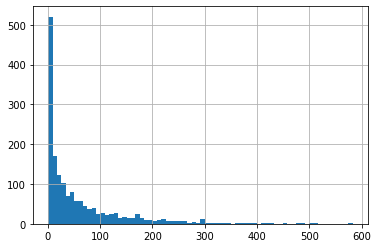

In [17]:
stars['No. of ratings'].hist(bins=70)

<AxesSubplot:>

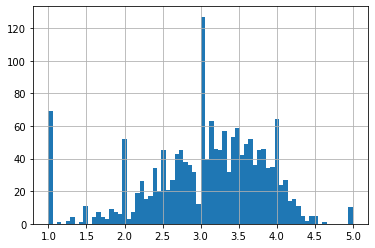

In [18]:
stars['ratings'].hist(bins=70)

In [20]:
stars['No. of ratings'].sort_values(ascending=False).to_frame()

,No. of ratings
movie,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
Hostile Intentions (1994),1
Normal Life (1996),1
Touki Bouki (Journey of the Hyena) (1973),1


In [38]:
moviedata = df.pivot_table(index = "user_id" , columns = "movie", values = "ratings")

In [87]:
moviedata

movie,"""20,000 Leagues Under the Sea (1954)""","""39 Steps, The (1935)""","""Abyss, The (1989)""","""Addiction, The (1995)""","""Adventures of Pinocchio, The (1996)""","""Adventures of Priscilla, Queen of the Desert, The (1994)""","""Adventures of Robin Hood, The (1938)""","""Affair to Remember, An (1957)""","""African Queen, The (1951)""","""Age of Innocence, The (1993)""",...,Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
stars["No. of ratings"].sort_values(ascending=False).to_frame()

,No. of ratings
movie,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
Hostile Intentions (1994),1
Normal Life (1996),1
Touki Bouki (Journey of the Hyena) (1973),1


In [41]:
starwars_UserRatings = moviedata['Star Wars (1977)'] #just storing the value from moviedata table in the variable
starwars_UserRatings.head()

user_id
0    NaN
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [72]:
recommended_movies = moviedata.corrwith(starwars_UserRatings)
recommended_movies

D:\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie
"20,000 Leagues Under the Sea (1954)"    0.289768
"39 Steps, The (1935)"                   0.106453
"Abyss, The (1989)"                      0.203709
"Addiction, The (1995)"                  0.507093
"Adventures of Pinocchio, The (1996)"    0.111616
                                           ...   
Young Guns (1988)                        0.186377
Young Guns II (1990)                     0.228615
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [53]:
recommendation = pd.DataFrame(recommended_movies,columns=["Correlation"])
recommendation.dropna(inplace=True)
recommendation.head()

,Correlation
movie,
"""20,000 Leagues Under the Sea (1954)""",0.289768
"""39 Steps, The (1935)""",0.106453
"""Abyss, The (1989)""",0.203709
"""Addiction, The (1995)""",0.507093
"""Adventures of Pinocchio, The (1996)""",0.111616


In [56]:
recommendation.sort_values('Correlation', ascending=False).head(10)

,Correlation
movie,
No Escape (1994),1.0
Commandments (1997),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Star Wars (1977),1.0
Stripes (1981),1.0
Cosi (1996),1.0
Mondo (1996),1.0
Hurricane Streets (1998),1.0


In [58]:
recommendation = recommendation.join(stars['No. of ratings'])

In [59]:
recommendation

,Correlation,No. of ratings
movie,,
"""20,000 Leagues Under the Sea (1954)""",0.289768,72
"""39 Steps, The (1935)""",0.106453,59
"""Abyss, The (1989)""",0.203709,151
"""Addiction, The (1995)""",0.507093,11
"""Adventures of Pinocchio, The (1996)""",0.111616,39
...,...,...
Young Frankenstein (1974),0.192589,200
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44


In [63]:
recommendation[recommendation['No. of ratings']>100].sort_values('Correlation',ascending=False).head(10) #movies having more the 100 reviews

,Correlation,No. of ratings
movie,,
Star Wars (1977),1.000000,583
"""Empire Strikes Back, The (1980)""",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"""Sting, The (1973)""",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"""Frighteners, The (1996)""",0.332729,115


## another movie liar liar

In [68]:
userRatings_liarliar = moviedata['Liar Liar (1997)']

In [84]:
recommendation4_liarliar = moviedata.corrwith(userRatings_liarliar)
recommendation4_liarliar

D:\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\anaconda\envs\tensorflow\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie
"20,000 Leagues Under the Sea (1954)"   -0.027932
"39 Steps, The (1935)"                   0.400918
"Abyss, The (1989)"                      0.245412
"Addiction, The (1995)"                 -0.394771
"Adventures of Pinocchio, The (1996)"    0.553115
                                           ...   
Young Guns (1988)                        0.410988
Young Guns II (1990)                     0.352174
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [88]:
userRatings_liarliar

user_id
0      NaN
1      NaN
2      1.0
3      2.0
4      5.0
      ... 
939    NaN
940    4.0
941    4.0
942    NaN
943    NaN
Name: Liar Liar (1997), Length: 944, dtype: float64

In [74]:
recomm_liarliar = pd.DataFrame(recommendation4_liarliar,columns=['Correlation'] )

In [75]:
recomm_liarliar

,Correlation
movie,
"""20,000 Leagues Under the Sea (1954)""",-0.027932
"""39 Steps, The (1935)""",0.400918
"""Abyss, The (1989)""",0.245412
"""Addiction, The (1995)""",-0.394771
"""Adventures of Pinocchio, The (1996)""",0.553115
...,...
Young Guns (1988),0.410988
Young Guns II (1990),0.352174
Zeus and Roxanne (1997),-0.500000


In [76]:
recomm_liarliar.sort_values('Correlation', ascending=False)

,Correlation
movie,
Moonlight and Valentino (1995),1.0
"""Bonheur, Le (1965)""",1.0
Johnny 100 Pesos (1993),1.0
Crossfire (1947),1.0
Of Human Bondage (1934),1.0
...,...
Wings of Courage (1995),NaN
Witness (1985),NaN
Yankee Zulu (1994),NaN


In [77]:
recomm_liarliar = recomm_liarliar.join(stars['No. of ratings'])

In [79]:
recomm_liarliar

,Correlation,No. of ratings
movie,,
"""20,000 Leagues Under the Sea (1954)""",-0.027932,72
"""39 Steps, The (1935)""",0.400918,59
"""Abyss, The (1989)""",0.245412,151
"""Addiction, The (1995)""",-0.394771,11
"""Adventures of Pinocchio, The (1996)""",0.553115,39
...,...,...
Young Guns (1988),0.410988,101
Young Guns II (1990),0.352174,44
Zeus and Roxanne (1997),-0.500000,6


In [83]:
recomm_liarliar[recomm_liarliar['No. of ratings']>100].sort_values('Correlation',ascending=False).head(10) #picking movies which have ratings more than 100

,Correlation,No. of ratings
movie,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"""Mask, The (1994)""",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


In [ ]:
# the above table 'recomm_liarliar' is showing the recommended movies that the user should watch too after watching liar liar
# if the user already watched liar liar then he or she go for BATMAN FOREVER or THE MASK.
#because those recomended movies have very strong correlation with LIAR LIAR and almost, they have same cast too. 